In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Q1

## Part A

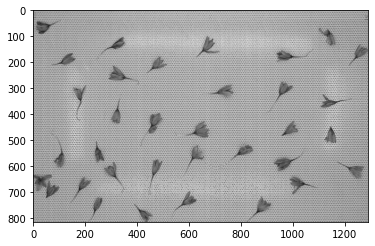

In [33]:
img = cv2.imread('img_01.jpg', 0)
plt.imshow(img, cmap='gray')

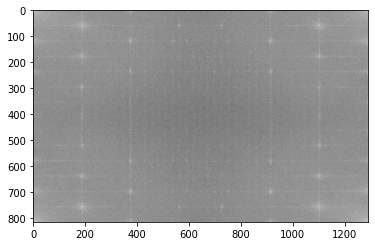

In [36]:
fft_img = np.fft.fft2(img)
plt.imshow(np.log(np.absolute(fft_img.real)), cmap='gray')

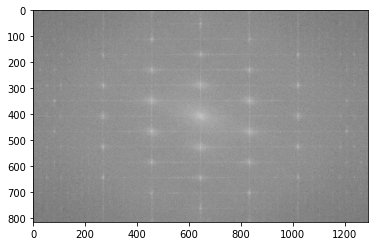

In [34]:
# shift FFT to the center
fft_img_shift = np.fft.fftshift(fft_img)
# extract real and phases
real = fft_img_shift.real
phases = fft_img_shift.imag

show_fft = np.log(np.absolute(real))
plt.imshow(show_fft, cmap='gray')

In [28]:
noised_cells = []
for i in range(show_fft.shape[0]):
  for j in range(show_fft.shape[1]):
    if show_fft[i,j]>14.5 and not (i==407 and j==645):
      noised_cells.append((i,j))
print(len(noised_cells))

20


In [29]:
real_mod = real.copy()
for x,y in noised_cells:
  real_mod[x,y] = 0

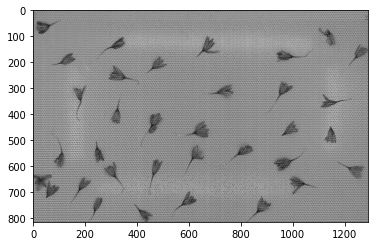

In [30]:
fft_img_shift_mod = np.empty(real.shape, dtype=complex)

# insert real and phases to the new file
fft_img_shift_mod.real = real_mod
fft_img_shift_mod.imag = phases

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift_mod)

# reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img_mod)
img_mod = np.abs(img_mod)

plt.imshow(img_mod, cmap='gray')
img_mod[407, 645] = 0

## Part B

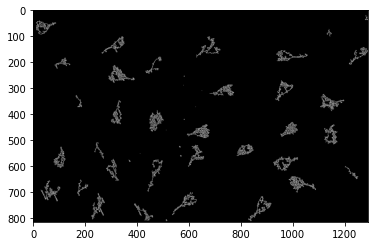

In [22]:
canny_output = cv2.Canny(img_mod.astype(np.uint8), 100, 600)
plt.imshow(canny_output, cmap='gray')

## Part C

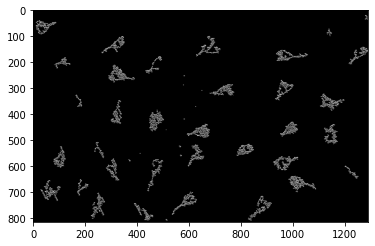

In [23]:
# Define kernel for x differences
kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
# Define kernel for y differences
ky = np.array([[1,2,1] ,[0,0,0], [-1,-2,-1]])
# Perform x convolution
x=ndimage.convolve(canny_output,kx)
# Perform y convolution
y=ndimage.convolve(canny_output,ky)
# sobel=np.hypot(x,y)
plt.imshow(y,cmap='gray')

In [24]:
at2 = np.arctan2(y,x)

print(len(at2[at2>0]), 'pixels with positive gradient from all', at2.shape[0]*at2.shape[1], 'pixels!') 

43925 pixels with positive gradient from all 1051350 pixels!


# Q2

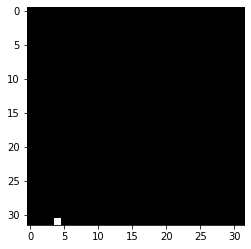

In [10]:
img = np.zeros((32,32))
img[31,4] = 255

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Imagination')

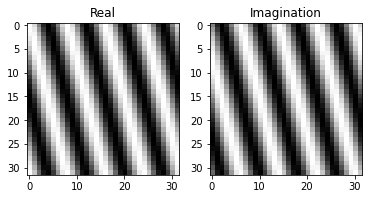

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.fft.fft2(img).real, cmap='gray')
ax1.set_title('Real')
ax2.imshow(np.fft.fft2(img).imag, cmap='gray')
ax2.set_title('Imagination')

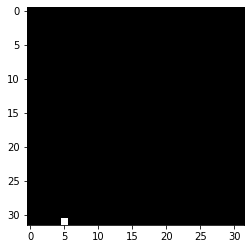

In [12]:
img[31,4] = 0
img[31,5] = 255

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Imagination')

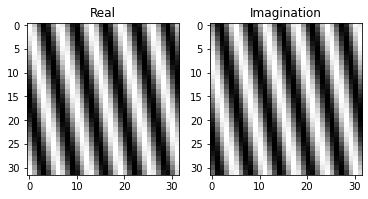

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.fft.fft2(img).real, cmap='gray')
ax1.set_title('Real')
ax2.imshow(np.fft.fft2(img).imag, cmap='gray')
ax2.set_title('Imagination')

# Q3

[[  0.   0.   0. 255. 255.]
 [  0.   0.   0. 255. 255.]
 [  0.   0.   0. 255. 255.]
 [  0.   0.   0. 255. 255.]
 [  0.   0.   0. 255. 255.]]


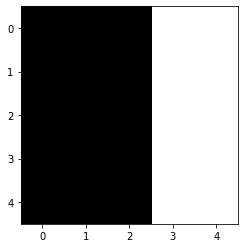

In [31]:
matrix = np.zeros((5,5))
matrix[:,3:] = 255

print(matrix)
plt.imshow(matrix, cmap='gray')

[[    0.     0. -1020. -1020.     0.]
 [    0.     0. -1020. -1020.     0.]
 [    0.     0. -1020. -1020.     0.]
 [    0.     0. -1020. -1020.     0.]
 [    0.     0. -1020. -1020.     0.]]


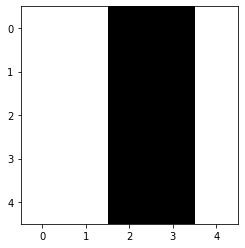

In [32]:
sobel_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

result = ndimage.convolve(matrix, sobel_kernel)
print(result)
plt.imshow(result, cmap='gray')

# Q4

[ 98 255]


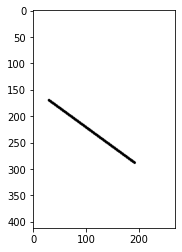

In [16]:
img = cv2.imread('/content/img_02.jpg', 0)
print(np.unique(img))
plt.imshow(img, cmap='gray')

In [17]:
x, y = [], []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j] == 98:
      x.append(i)
      y.append(j)

In [18]:
xy = [x[i]*y[i] for i in range(len(x))]
x2 = [i**2 for i in x]

m = (np.average(x)*np.average(y) - np.average(xy))/(np.average(x)**2-np.average(x2))
c = np.average(y) - m*np.average(x)

print('y = {}x{}'.format(round(m,2), round(c,2)))

y = 1.37x-202.97
